In this notebook, we'll build a simple math agent using the Mistral Agents API, leveraging its built-in code execution tool to solve mathematical problems.

# 1. Setting up dependencies


## 1.1 Installing the Mistral library

In [ ]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.2/373.2 kB 13.3 MB/s eta 0:00:00


## 1.2 Loading the Mistral API Key
You can get an API key from https://console.mistral.ai/api-keys

In [ ]:
from getpass import getpass
apiKey = getpass('Enter Mistral API Key: ')

Enter Mistral API Key: ··········


# 2. Creating the Mistral client and Agent

The following code creates a custom math agent using the Mistral Agents API. The agent, named **Math Helper**, is configured to solve mathematical problems, evaluate expressions, and explain concepts. It uses the *mistral-medium-2505* model along with Mistral's built-in *code_interpreter* tool, allowing it to run Python code when needed. The agent is initialized with clear instructions and tuned with specific completion parameters to ensure accurate and focused responses.

In [ ]:
from mistralai import Mistral
client = Mistral(apiKey)

In [ ]:
math_agent = client.beta.agents.create(
    model="mistral-medium-2505",
    description="An agent that solves math problems and evaluates expressions.",
    name="Math Helper",
    instructions="You are a helpful math assistant. You can explain concepts, solve equations, and evaluate math expressions using the code interpreter.",
    tools=[{"type": "code_interpreter"}],
    completion_args={
        "temperature": 0.2,
        "top_p": 0.9
    }
)

# 3. Running the Agent

## 3.1 Initializing the conversation

The following code initiates a new conversation with the math_agent, asking it to solve the quadratic equation 2x² + 3x - 2 = 0. The start() method sends the input query to the agent, which uses the specified model and tools (like the code interpreter) to generate a response. The result, including the assistant’s explanation and code execution, is stored in the response variable.

In [ ]:
response = client.beta.conversations.start(
    agent_id=math_agent.id, inputs="Solve the quadratic equation 2x² + 3x - 2 = 0", #store=False
)

response

ConversationResponse(conversation_id='conv_0683c1b8dfff72d9800003f28f1ea202', outputs=[MessageOutputEntry(content="To solve the quadratic equation \\(2x^2 + 3x - 2 = 0\\), we can use the quadratic formula:\n\n\\[ x = \\frac{-b \\pm \\sqrt{b^2 - 4ac}}{2a} \\]\n\nwhere \\(a = 2\\), \\(b = 3\\), and \\(c = -2\\).\n\nLet's calculate the solutions step-by-step.", object='entry', type='message.output', created_at=datetime.datetime(2025, 6, 1, 9, 21, 18, 172555, tzinfo=TzInfo(UTC)), completed_at=datetime.datetime(2025, 6, 1, 9, 21, 18, 787860, tzinfo=TzInfo(UTC)), id='msg_0683c1b8e2c279e280004acabf39b047', agent_id='ag_0683c1ae5180761780008f1cce902c71', model='mistral-medium-2505', role='assistant'), ToolExecutionEntry(name='code_interpreter', object='entry', type='tool.execution', created_at=datetime.datetime(2025, 6, 1, 9, 21, 18, 897177, tzinfo=TzInfo(UTC)), completed_at=datetime.datetime(2025, 6, 1, 9, 21, 21, 254994, tzinfo=TzInfo(UTC)), id='tool_exec_0683c1b8ee5a7ad78000bc59004dab7a', i

## 3.2 Final Output

In [ ]:
response.outputs[2].content

'The solutions to the quadratic equation \\(2x^2 + 3x - 2 = 0\\) are \\(x = 0.5\\) and \\(x = -2.0\\).'

## 3.3 Executed Code

In [ ]:
print(response.outputs[1].info['code'])

# Coefficients from the quadratic equation: 2x² + 3x - 2 = 0
import math

# Define the coefficients
a = 2
b = 3
c = -2

# Calculate the discriminant
D = b**2 - 4*a*c

# Calculate the two solutions
x1 = (-b + math.sqrt(D)) / (2*a)
x2 = (-b - math.sqrt(D)) / (2*a)

x1, x2


## 3.4 Continuing the conversation
This ensures that the agent retains the context and builds upon the previous interactions, allowing for a more natural and coherent dialogue.

In [ ]:
response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="Plot the function f(x) = 2x² + 3x - 2"
)

In [ ]:
response.outputs[2].content[1].text

'Here is the plot of the function \\( f(x) = 2x^2 + 3x - 2 \\). It is a parabola opening upwards, characteristic of quadratic functions with a positive coefficient for \\(x^2\\). The roots of the equation, where the curve intersects the x-axis, are at \\(x = 0.5\\) and \\(x = -2.0\\), as previously calculated.'

In [ ]:
print(response.outputs[1].info['code'])

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 2*x**2 + 3*x - 2

# Generate x values
x_values = np.linspace(-5, 5, 400)
# Calculate corresponding y values
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = 2x^2 + 3x - 2$')
plt.title('Plot of the function $f(x) = 2x^2 + 3x - 2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.8)  # x-axis
plt.axvline(0, color='black', linewidth=0.8)  # y-axis
plt.grid(True)
plt.legend()
plt.show()


## 3.5 Downloading the generated image and plotting it

In [ ]:
file_id = response.outputs[2].content[0].file_id
file_bytes = client.files.download(file_id=file_id).read()

In [ ]:
with open(f"image_generated.png", "wb") as file:
    file.write(file_bytes)

This will download the generated image as ***image_generated.png*** in the current directory. We can display the the same using the following code

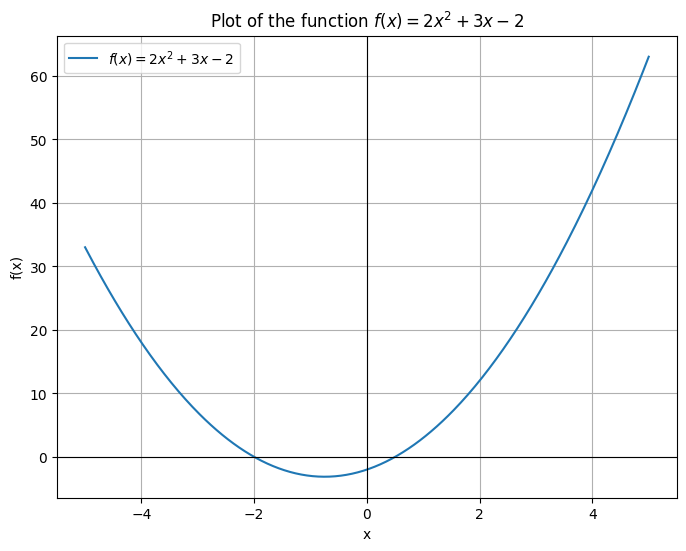

In [ ]:
from IPython.display import Image, display
image_path = "image_generated.png"

display(Image(filename=image_path))